# MR2CT code for Task 1 brain validation dataset downloaded from Synthrad2023 challenge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug 22 02:48:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------



1.   Download the validation data from challenge website at this link (https://zenodo.org/record/8003760)
2.   Save this data in some folder (pelvis_data folder)

In [ ]:
#create a trial folder manually and set the root
%cd /content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task

/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task


In [ ]:
root = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task'

In [ ]:
!pip install nibabel
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-c9gcwsaw
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-c9gcwsaw
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=a9b117578e235fae75365d7a046bd39d4b33f137844f957c061c535cd068dc1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ffbbqr7a/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 33.6 MB/s eta 0:00:00


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Process one subject at a time from Validation data folder

In [ ]:
#convert 3D nifti mr volumes to 2D jpg slices for  each  subject in validation data folder for brain

#Run this only once for creating jpg image slices for 3D nifti volumes

#val subjects: [1BA004, 1BA034, 1BA060, 1BA074,1BA136,1BA202,1BA211,1BA261,1BA311, 1BA381]
#              [1BB013,1BB019,1BB035,1BB037,1BB053,1BB060,1BB084,1BB104,1BB176,1BB199]
#              [1BC015,1BC026,1BC030,1BC042,1BC044,1BC059,1BC069,1BC079,1BC092,1BC093]

The scan data array has the shape:  (220, 251, 189)
The scan header is as follows: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 220 251 189   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 106.5
qoffset_y  

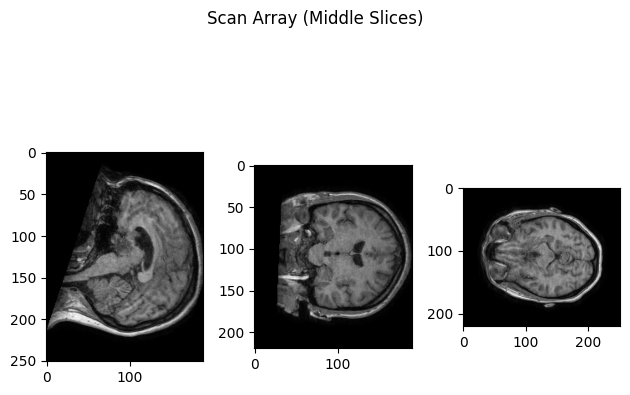

The required aspect ratios are:  [1.0, 1.0, 1.0]


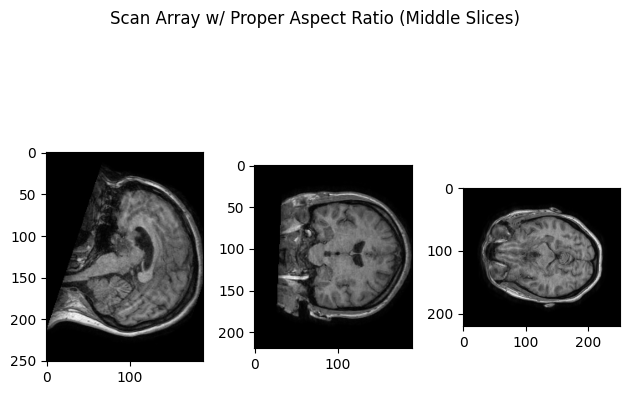

The new scan size is:  (220, 251, 189)


In [ ]:
#Define the filepath to your NIfTI scan
subject_id='1BA004'
vol = 'mr'
mode ='val'
subject_path = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/Task1_val/Task1/brain/'+subject_id+'/'+vol+'.nii.gz'


#Load the scan and extract data using nibabel
scan = nib.load(subject_path)
scanArray = scan.get_fdata()


#Get and print the scan's shape
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)

#Get and print the scan's header
scanHeader = scan.header
print('The scan header is as follows: \n', scanHeader)

#Display scan array's middle slices
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()

#Calculate proper aspect ratios
pixDim = scanHeader['pixdim'][1:4]
aspectRatios = [pixDim[1]/pixDim[2],pixDim[0]/pixDim[2],pixDim[0]/pixDim[1]]
print('The required aspect ratios are: ', aspectRatios)

#Display scan array's middle slices with proper aspect ratio
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array w/ Proper Aspect Ratio (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], aspect = aspectRatios[0], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], aspect = aspectRatios[1], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], aspect = aspectRatios[2], cmap='gray')
fig.tight_layout()
plt.show()

#Calculate new image dimensions from aspect ratio
newScanDims = np.multiply(scanArrayShape, pixDim)
newScanDims = (round(newScanDims[0]),round(newScanDims[1]),round(newScanDims[2]))
print('The new scan size is: ', newScanDims)

#Set the output file path
outputPath = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/mr_val'


#Iterate and save scan slices along 0th dimension
for i in range(scanArrayShape[0]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[i,:,:], (newScanDims[2],newScanDims[1]))
    #Save the slice as .png image
    cv2.imwrite(outputPath+'/Dim0_Slice'+str(i)+'.png', outputArray)

#Iterate and save scan slices along 1st dimension
for i in range(scanArrayShape[1]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[:,i,:], (newScanDims[2],newScanDims[0]))
    #Save the slice as .png image
    cv2.imwrite(outputPath+'/Dim1_Slice'+str(i)+'.png', outputArray)

#Iterate and save scan slices along 2nd dimension
for i in range(scanArrayShape[2]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[:,:,i], (newScanDims[1],newScanDims[0]))
    #Rotate slice clockwise 90 degrees
    outputArray = cv2.rotate(outputArray, cv2.ROTATE_90_CLOCKWISE)
    #Save the slice as .png image
    cv2.imwrite(outputPath+'/Dim2_Slice'+str(i)+'.png', outputArray)

In [ ]:
# Prepare the mri  images for each subject in validation dataset into numpy file and save it as npyz

from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from numpy import savez_compressed


# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

# dataset path
path = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/mr_val/'
# load dataset A
dataA = load_images(path)

print('Loaded val_dataMRI: ', dataA.shape)
# load dataset B
#dataB = load_images(path + 'ct_val/')
#print('Loaded val_dataCT: ', dataB.shape)
# save as compressed numpy array
filename = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/'+subject_id+'val_brain_mr2ct_256.npz'
#savez_compressed(filename, dataA, dataB)
savez_compressed(filename, dataA)
print('Saved val dataset: ', filename)

Loaded val_dataMRI:  (660, 256, 256, 3)
Saved val dataset:  /content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/1BA004val_brain_mr2ct_256.npz


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 13s 13s/step


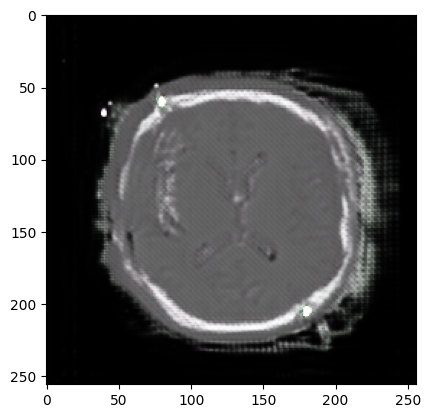

In [ ]:
# testing with one image from validation set for mr2ct translation with trained cycle gan model
#example of using saved cyclegan models for image translation
from numpy import expand_dims
from keras.models import load_model
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from matplotlib import pyplot
import cv2
import os

sct_root='/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/synth_ct_val/'
# load an image to the preferred size
def load_image(filename, size=(256,256)):
	# load and resize the image
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# transform in a sample
	pixels = expand_dims(pixels, 0)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	return pixels


output_dir = sct_root
# load input image
#image_path = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/mr_val/'+subject_id+'_slice_100.jpg'
image_path = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/mr_val/'+'Dim2_Slice100.png'
image_src = load_image(image_path)
# load the model
cust = {'InstanceNormalization': InstanceNormalization}
#load trained cyclegan model on training dataset for pelvis
model_AtoB = load_model('/content/drive/MyDrive/synthrad2023/synthrad_data/brain_data/g_model_AtoB_019860.h5', cust)
# translate image
image_tar = model_AtoB.predict(image_src)
# scale from [-1,1] to [0,1]
image_tar = (image_tar + 1) / 2.0
# plot the translated CT image
pyplot.imshow(image_tar[0])
pyplot.show()
pyplot.close()


Loaded (662, 256, 256, 3)


1/1 [==============================] - 1s 700ms/step


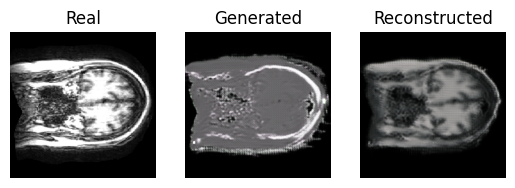

In [ ]:
#Now complete the same translation for a batch of few images for one subject and
#visualise few images for one subject from validation dataset
# inference- example of using saved cyclegan models for image translation for validation dataset

from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1 = data['arr_0']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	#X2 = (X2 - 127.5) / 127.5
	return X1

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
#A_data, B_data = load_real_samples('/content/drive/MyDrive/synthrad2023/synthrad_data/mr2ct_gan_model/val_mr2ct_256.npz')
A_data = load_real_samples('/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/'+subject_id+'val_brain_mr2ct_256.npz')
print('Loaded', A_data.shape)
# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/drive/MyDrive/synthrad2023/synthrad_data/brain_data/g_model_AtoB_019860.h5', cust)
model_BtoA = load_model('/content/drive/MyDrive/synthrad2023/synthrad_data/brain_data/g_model_BtoA_019860.h5', cust)
# plot A->B->A
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)


In [ ]:
#Now complete the same translation for all images for one subject from validation dataset
# and save the synthetic/translated sCT jpgs it in a folder "synth_ct_val"
# inference- example of using saved cyclegan models for image translation for validation dataset
vol='sCT'
mode='val'
import numpy as np
synth_ct_path = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_sct_brain/sct_'+subject_id

# load dataset

A_data = load_real_samples('/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/'+subject_id+'val_brain_mr2ct_256.npz')
print('Loaded', A_data.shape)
# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/drive/MyDrive/synthrad2023/synthrad_data/brain_data/g_model_AtoB_019860.h5', cust)
model_BtoA = load_model('/content/drive/MyDrive/synthrad2023/synthrad_data/brain_data/g_model_BtoA_019860.h5', cust)
# plot A->B->A
A_real = A_data
B_generated  = model_AtoB.predict(A_real)
#A_reconstructed = model_BtoA.predict(B_generated)
images = ((B_generated))
# scale from [-1,1] to [0,1]
synth_images = (images + 1) / 2.0






Loaded (662, 256, 256, 3)


21/21 [==============================] - 28s 1s/step


In [ ]:
#ni_img = nib.Nifti1Image(synth_images, None)
ni_img = nib.Nifti1Image(synth_images, np.eye(4))
nib.save(ni_img, "B2_generated.nii.gz")

The scan data array has the shape:  (662, 256, 256, 3)
The scan header is as follows: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4 662 256 256   3   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y  

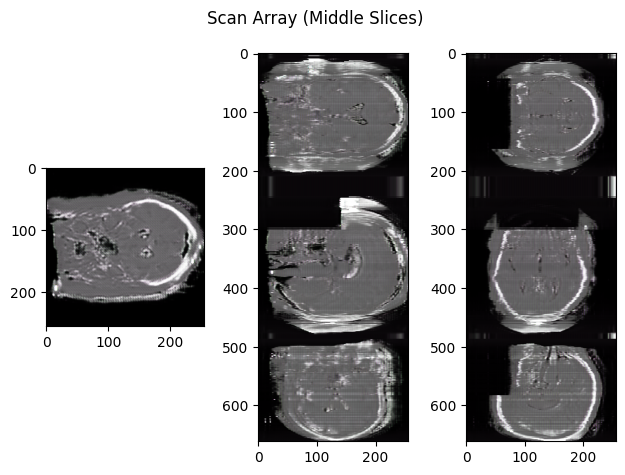

In [ ]:
subject_path = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/B2_generated.nii.gz'

#Load the scan and extract data using nibabel
scan = nib.load(subject_path)
scanArray = scan.get_fdata()


#Get and print the scan's shape
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)

#Get and print the scan's header
scanHeader = scan.header
print('The scan header is as follows: \n', scanHeader)

#Display scan array's middle slices
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()


In [ ]:
# Now convert the synthesized CT to nifti volume and save it in a separate folder for uploading it to challenge website

In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 29.8 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/synth_ct_val

/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/synth_ct_val


In [ ]:
#convert to nifti
import os
import cv2
import numpy as np
import nibabel as nib


input_folder = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/synth_ct_val'
output_folder = '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/'

jpg_files = [file for file in os.listdir(input_folder) if file.endswith('.jpg')]
jpg_files.sort()
first_image = cv2.imread(os.path.join(input_folder, jpg_files[0]), cv2.IMREAD_GRAYSCALE)
volume_shape = (first_image.shape[0], first_image.shape[1], len(jpg_files))
volume_data = np.zeros(volume_shape, dtype=np.uint8)

for i, file in enumerate(jpg_files):
    image = cv2.imread(os.path.join(input_folder, file), cv2.IMREAD_GRAYSCALE)
    volume_data[:,:,i] = image

nifti_image = nib.Nifti1Image(volume_data, None)
nib.save(nifti_image, os.path.join(output_folder, f'sct_.nii.gz'))


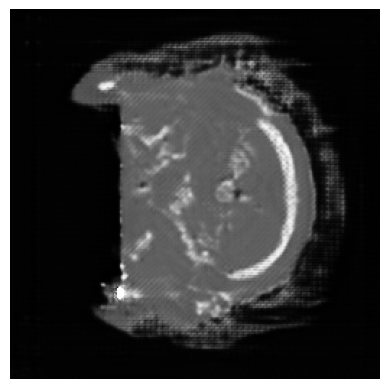

In [ ]:

import nibabel as nib
import matplotlib.pyplot as plt
from skimage import color


img = nib.load('/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/sct_.nii.gz')
# Retrieve image data
data = img.get_fdata()

# Convert image to grayscale
#grayscale_data = color.rgb2gray(data)
grayscale_data=data
# Display central slice of the image volume
#central_slice = grayscale_data[:, :, grayscale_data.shape[2] // 2]
central_slice = grayscale_data[:, :, 100]
plt.imshow(central_slice, cmap='gray', origin='lower')
pyplot.axis('off')
plt.show()


In [ ]:
import os
!rm -r '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/synth_ct_val'
!rm -r '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/mr_val'

In [ ]:
path = "/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/synth_ct_val"
os.mkdir(path)
path = "/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_task_brain/mr_val"
os.mkdir(path)

In [ ]:
%rm -r '/content/drive/MyDrive/synthrad2023/synthrad_data/Validation_Task/val_brain_mr2ct_256.npz'

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
